# ODE Solver
### Examples of common ODEs and their solutions using scipy's `odeint` function.

I studies from this site: https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations
while creating this notebook.

##### Import libraries

In [24]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

## simple ODE's (not coupled)

#### Exponential growth
$$
\frac{dx}{dt} = kx
$$
where $k$ is the growth rate.

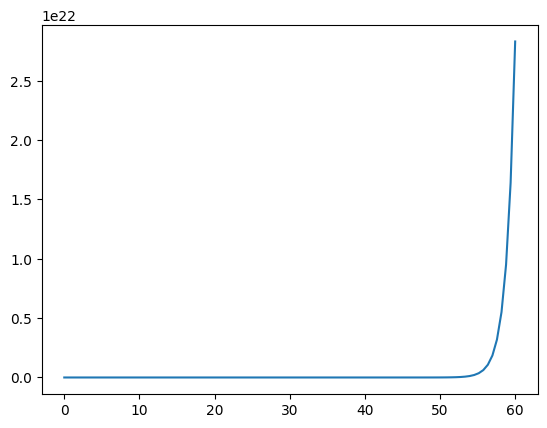

In [34]:
def ode_exponential_growth(x, t, k):
    dxdt = k*x
    return dxdt

x0 = 0.1

t = np.linspace(0, 60, 100)
k = 0.9
x = odeint(ode_exponential_growth, x0, t, args=(k,))

plt.plot(t, x)
plt.show()

#### Simple harmonic oscillator
$$
m\frac{d^2x}{dt^2} = -kx
$$
where $m$ is the mass and $k$ is the spring constant. This is a second order ODE. But `odeint` can only solve first order ODE's. So,
in order to solve 2nd order ODE's, we need to convert them to a system of first order ODE's.

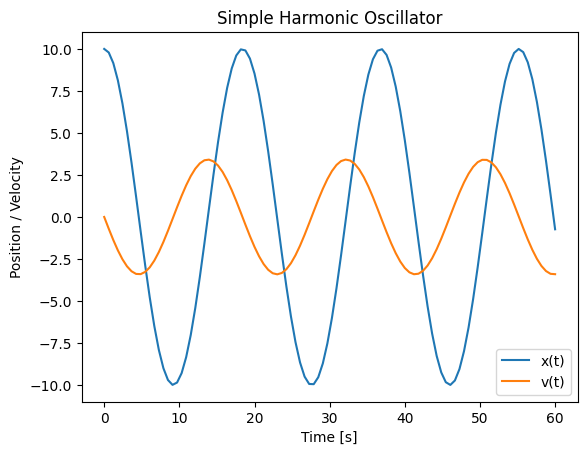

In [37]:
def ode_simple_harmonic_oscillator(y, t, k, m):
    x, v = y  # y is a vector where y[0] = x0 and y[1] = v0
    dxdt = v
    dvdt = -k*x/m
    return [dxdt, dvdt]

# Initial conditions
x0 = 10
v0 = 0
y0 = [x0, v0]

# Time points where solution is computed
t = np.linspace(0, 60, 100)

# Parameters
k = 0.7
m = 6

# Solve ODE
sol = odeint(ode_simple_harmonic_oscillator, y0, t, args=(k, m))

# Plot the results
plt.plot(t, sol[:, 0], label='x(t)')  # sol[:, 0] is x(t)
plt.plot(t, sol[:, 1], label='v(t)')  # sol[:, 1] is v(t)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position / Velocity')
plt.title('Simple Harmonic Oscillator')
plt.show()

#### Damped harmonic oscillator
$$
m\frac{d^2x}{dt^2} + q\frac{dx}{dt} + kx = 0
$$
where $m$ is the mass, $q$ is the damping coefficient and $k$ is the
spring constant.

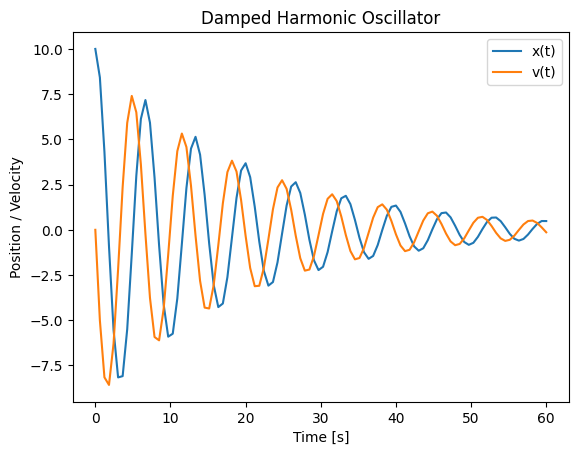

In [28]:
def ode_damped_harmonic_oscillator(y, t, k, m, q):
    x, v = y  # y is a vector where y[0] = x0 and y[1] = v0
    dxdt = v
    dvdt = -k*x/m - q*v/m
    return [dxdt, dvdt]

# Initial conditions
x0 = 10
v0 = 0
y0 = [x0, v0]

# Time points where solution is computed
t = np.linspace(0, 60, 100)

# Parameters
k = 0.9
m = 1
q = 0.1

# Solve ODE
sol = odeint(ode_damped_harmonic_oscillator, y0, t, args=(k, m, q))

# Plot the results
plt.plot(t, sol[:, 0], label='x(t)')  # sol[:, 0] is x(t)
plt.plot(t, sol[:, 1], label='v(t)')  # sol[:, 1] is v(t)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position / Velocity')
plt.title('Damped Harmonic Oscillator')
plt.show()

## Coupled ODE's

#### Problem 4 from apmonitor.com
$$

\begin{align*}
2*\frac{dx}{dt} &= -x(t) + u(t) \\
5*\frac{dy}{dt} &= -y(t) + x(t)
\end{align*}
$$
where $u$ is a step input that changes from 0 to 2 at $t = 5$.

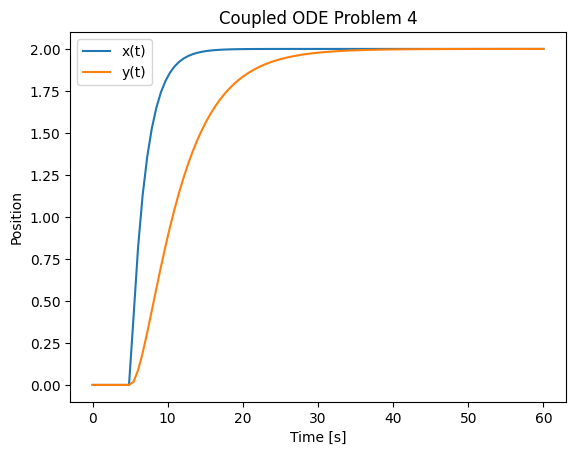

In [39]:
def coupled_ode_problem4(z, t):
    x, y = z # z is a vector where z[0] = x and z[1] = y
    u = 0 if t <= 5 else 2
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    return [dxdt, dydt]

# Initial conditions
x0 = 0
y0 = 0
z0 = [x0, y0]

# Time points where solution is computed
t = np.linspace(0, 60, 100)

# Solve ODE
sol = odeint(coupled_ode_problem4, z0, t)

# Plot the results
plt.plot(t, sol[:, 0], label='x(t)')  # sol[:, 0] is x(t)
plt.plot(t, sol[:, 1], label='y(t)')  # sol[:, 1] is y(t)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.title('Coupled ODE Problem 4')
plt.show()

#### Coupled harmonic oscillators
$$

\begin{align*}
m_1\frac{d^2x_1}{dt^2} &= -k_1(x_1 - x_2) \\
m_2\frac{d^2x_2}{dt^2} &= -k_2(x_2 - x_1)
\end{align*}
$$
where $m_1$ and $m_2$ are the masses, $k_1$ and $k_2$ are the spring constants.

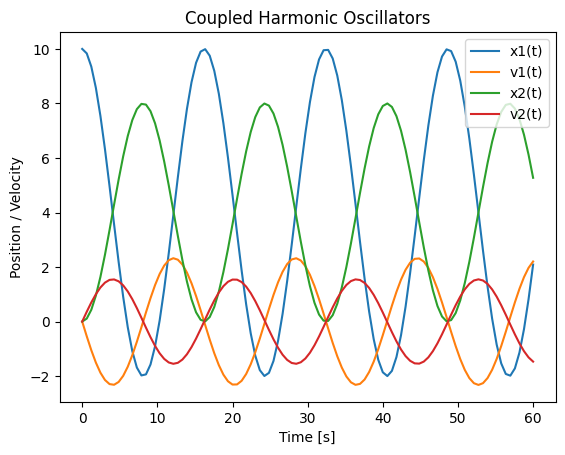

In [49]:
def ode_coupled_harmonic_oscillators(y, t, k1, k2, m1, m2):
    x1, v1, x2, v2 = y  # y is a vector where y[0] = x1, y[1] = v1, y[2] = x2, y[3] = v2
    dx1dt = v1
    dv1dt = (-k1*(x1 - x2))/m1
    dx2dt = v2
    dv2dt = (-k2*(x2 - x1))/m2
    return [dx1dt, dv1dt, dx2dt, dv2dt]

# Initial conditions
x1_0 = 10
v1_0 = 0
x2_0 = 0
v2_0 = 0
y0 = [x1_0, v1_0, x2_0, v2_0]

# Time points where solution is computed
t = np.linspace(0, 60, 100)

# Parameters
k1 = 0.9
k2 = 0.3
m1 = 10
m2 = 5

# Solve ODE
sol = odeint(ode_coupled_harmonic_oscillators, y0, t, args=(k1, k2, m1, m2))

# Plot the results
plt.plot(t, sol[:, 0], label='x1(t)')  # sol[:, 0] is x1(t)
plt.plot(t, sol[:, 1], label='v1(t)')  # sol[:, 1] is v1(t)
plt.plot(t, sol[:, 2], label='x2(t)')  # sol[:, 2] is x2(t)
plt.plot(t, sol[:, 3], label='v2(t)')  # sol[:, 3] is v2(t)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position / Velocity')
plt.title('Coupled Harmonic Oscillators')
plt.show()